<a href="https://colab.research.google.com/github/Sado-Hussien/Final-Project/blob/main/SUPERVISED_APPROACH_OF_MACHINE_LEARNING_IN_BIG_MARKET_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Verify that the file exists at the specified location
data_path = '/content/dataset (1).csv'
print(os.path.isfile(data_path))  # This should print 'True' if the file exists

# Attempt to read the CSV file with different encodings and inspect the structure
try:
    data = pd.read_csv(data_path, encoding='ISO-8859-1')
    print("Data loaded successfully with ISO-8859-1 encoding.")
    print(data.head(10))  # Print the first 10 rows to inspect
    print(data.columns)  # Print column names to inspect

except Exception as e:
    print(f"Error reading the CSV file: {e}")

True
Data loaded successfully with ISO-8859-1 encoding.
   CLOTHES  PRICE         PLACE                  TIME  Unnamed: 4
0  T-Shirt      15  Hayat Market  2023-04-30 01:00:00         NaN
1    Jeans      40  Hayat Market  2023-06-14 23:00:00         NaN
2   Jacket      60  Hayat Market  2019-03-20 05:00:00         NaN
3    Dress      30  Hayat Market  2024-01-12 18:00:00         NaN
4  Sweater      50  Hayat Market  2014-04-14 00:00:00         NaN
5    Shirt      25  Hayat Market  2015-08-01 23:00:00         NaN
6    Skirt      35  Hayat Market  2022-08-12 23:00:00         NaN
7     Coat      70  Hayat Market  2023-08-25 21:00:00         NaN
8   Blouse      45  Hayat Market  2023-04-27 06:00:00         NaN
9  T-Shirt      15  Hayat Market  2023-03-25 06:00:00         NaN
Index(['CLOTHES', 'PRICE ', 'PLACE ', 'TIME', 'Unnamed: 4'], dtype='object')


In [ ]:
# Strip leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Drop the unnamed column and handle missing values if any
if 'Unnamed: 4' in data.columns:
    data.drop(columns=['Unnamed: 4'], inplace=True)
data.dropna(inplace=True)

# Display the first few rows to confirm changes
print(data.head())
print(data.columns)  # Verify column names after stripping

# Convert TIME column to datetime
if 'TIME' in data.columns:
    data['TIME'] = pd.to_datetime(data['TIME'])

# Print the data types to verify
print(data.dtypes)

# Feature scaling - Ensure PRICE column is correctly scaled
if 'PRICE' in data.columns:
    scaler = StandardScaler()
    data['PRICE'] = scaler.fit_transform(data[['PRICE']])
else:
    print("ERROR: 'PRICE' column not found in the dataset.")

# Convert categorical variables to dummy variables
categorical_columns = ['CLOTHES', 'PLACE']
for col in categorical_columns:
    if col in data.columns:
        data = pd.get_dummies(data, columns=[col], drop_first=True)
    else:
        print(f"WARNING: '{col}' column not found in the dataset.")

# Split the data into features and target variable
X = data.drop(['TIME'], axis=1) if 'TIME' in data.columns else data.drop(['time'], axis=1)
y = data['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   CLOTHES  PRICE         PLACE                 TIME
0  T-Shirt     15  Hayat Market  2023-04-30 01:00:00
1    Jeans     40  Hayat Market  2023-06-14 23:00:00
2   Jacket     60  Hayat Market  2019-03-20 05:00:00
3    Dress     30  Hayat Market  2024-01-12 18:00:00
4  Sweater     50  Hayat Market  2014-04-14 00:00:00
Index(['CLOTHES', 'PRICE', 'PLACE', 'TIME'], dtype='object')
CLOTHES            object
PRICE               int64
PLACE              object
TIME       datetime64[ns]
dtype: object


In [ ]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

results = {}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    mse, r2, y_pred = evaluate_model(model, X_test, y_test)
    results[model_name] = {"MSE": mse, "R2": r2}
    predictions[model_name] = y_pred

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R2: {metrics['R2']}")

Linear Regression - MSE: 6.131750077874157e-31, R2: 1.0
Random Forest - MSE: 1.8369340056103978e-30, R2: 1.0
Gradient Boosting - MSE: 8.514827845666577e-10, R2: 0.9999999991241821
XGBoost - MSE: 5.828202098150907e-10, R2: 0.999999999400523


In [ ]:
# Save the best performing model
best_model = models["XGBoost"]
joblib.dump(best_model, '/content/dataset (1).csv')

['/content/dataset (1).csv']

In [ ]:
# Load the saved model
loaded_model = joblib.load('/content/dataset (1).csv')

# Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)

# Display predictions
print(y_pred)

[ 1.261758   -1.447788    1.8638415   1.261758    0.05750832 -0.54462296
  1.261758    0.3585619   0.3585619  -1.447788   -0.8456841  -0.54462296
 -0.8456841  -0.54462296 -0.24355887 -1.1467519   0.6596327   0.6596327
  0.6596327   1.261758   -0.8456841   0.6596327   1.8638415  -0.8456841
 -0.24355887  0.05750832  0.6596327  -0.24355887  1.261758    1.261758
 -0.8456841  -1.447788   -0.54462296 -0.54462296 -0.24355887  1.261758
 -1.447788    1.8638415   0.6596327   0.6596327   0.6596327   0.6596327
  0.6596327  -0.54462296  0.6596327  -0.54462296 -1.1467519  -0.8456841
  0.6596327   0.05750832  1.261758   -0.24355887  0.6596327   0.3585619
  1.8638415  -0.24355887 -0.8456841  -0.54462296  0.6596327   0.05750832
  0.6596327  -0.54462296  0.6596327   1.8638415   1.261758   -0.8456841
  1.261758   -0.24355887 -0.54462296 -0.24355887 -1.447788   -0.8456841
 -0.8456841  -0.24355887  1.8638415   0.05750832  1.8638415  -1.447788
  0.6596327   1.8638415   0.6596327   0.05750832 -0.8456841   0.

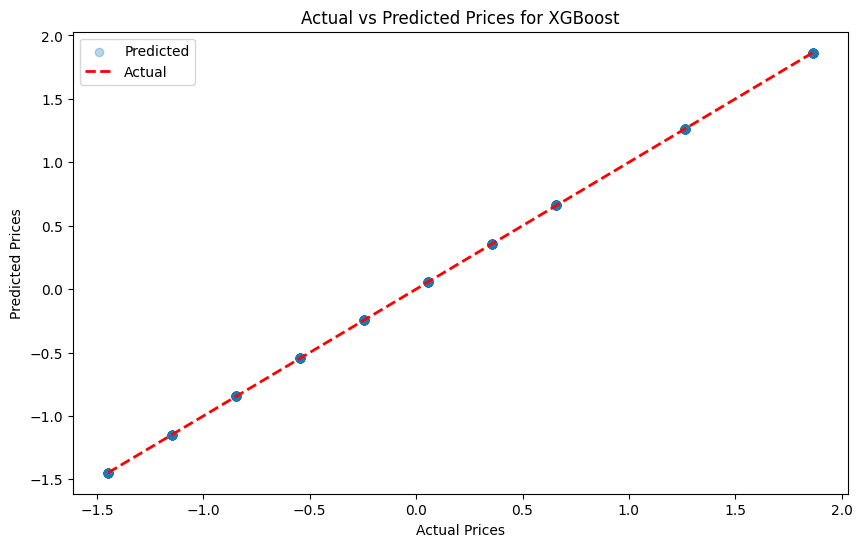

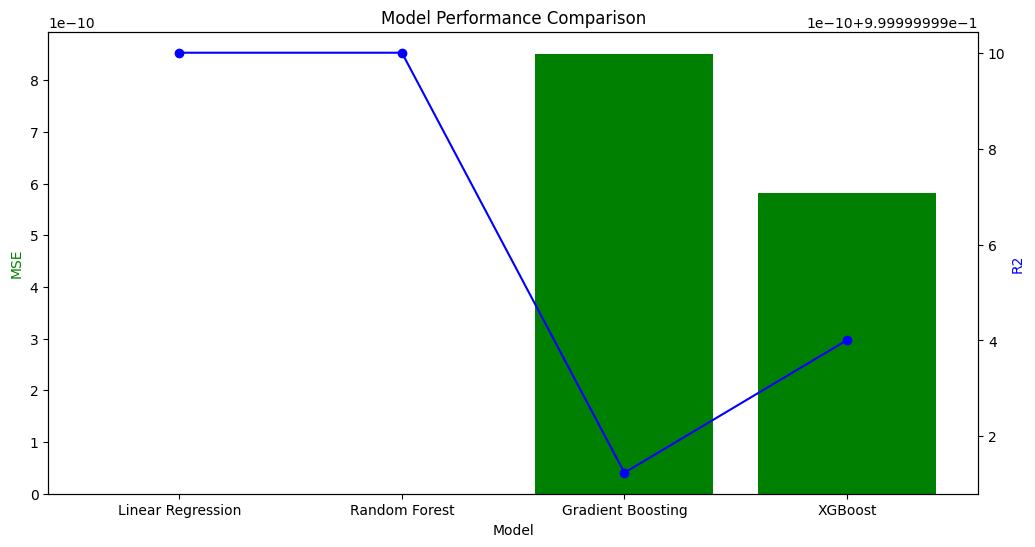

In [ ]:
# Visualization of model performance

# Plotting actual vs predicted prices for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions["XGBoost"], alpha=0.3, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices for XGBoost')
plt.legend()
plt.show()

# Bar plot of MSE and R2 for each model
model_names = list(results.keys())
mse_values = [results[model]["MSE"] for model in model_names]
r2_values = [results[model]["R2"] for model in model_names]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(model_names, mse_values, color='g')
ax2.plot(model_names, r2_values, color='b', marker='o', linestyle='-')

ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')

plt.title('Model Performance Comparison')
plt.show()